In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns

In [75]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [2]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [10]:
data = pd.read_csv('train.csv', header=0, sep='\t', encoding="utf8") #, delimiter=';'
data_test = pd.read_csv('test.csv', header=0, sep='\t', encoding="utf8") #, delimiter=';'
#data = data.dropna() #(24712, 22) 16476
print(data.shape)
#print(list(data.columns))
target = 'target'
data = data.drop(['_id'], axis=1)
data_test = data_test.drop(['_id'], axis=1)
#data.info()
data.describe(include='all').T
#data.isnull().sum()
#data.head()

(24712, 22)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,24712,NaN,NaN,NaN,40.0302,10.4623,17,32,38,47,98
job,24712,12,admin.,6254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,24712,4,married,14871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,24712,8,university.degree,7309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,24712,3,no,19567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,24712,3,yes,12934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,24712,3,no,20334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,24712,2,cellular,15729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,24712,10,may,8199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,24712,5,thu,5144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
X_col=[i for i in data.columns if i not in "target"]
X = data[X_col]
Y = data.target
num_features = ['age', 'duration','campaign', 'pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']  
cat_features = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
#[1,2,3,4,5,6,7,8,9,14]

In [73]:
X_with_dummies = pd.get_dummies( X, columns = cat_features )
X_train, X_test, Y_train, Y_test = train_test_split(X_with_dummies, Y, test_size=0.33, random_state=42)

In [74]:
#k-means
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn.fit(X_train, Y_train)
y_hat = knn.predict(X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [76]:
#k-means
scores_test = []
scores_train = []

for k in range(1, 15):
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    model.fit(X_train, Y_train, )
    
    y_hat_test = model.predict_proba(X_test)
    scores_test.append(roc_auc_score(Y_test, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X_train)
    scores_train.append(roc_auc_score(Y_train, y_hat_train[:, 1]))

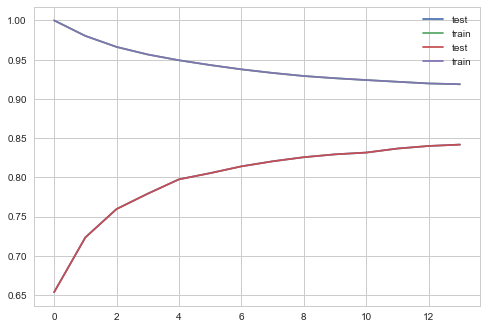

In [78]:
plt.plot(scores_test, label='test')
plt.plot(scores_train, label='train')
plt.legend()
plt.show()

In [85]:
# initialize data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
train_data = X_train
train_label = Y_train
test_data = X_test

In [80]:
from catboost import CatBoostRegressor, CatBoostClassifier
from catboost import Pool, CatBoost

In [98]:
#Cat boost
train_pool = Pool(train_data, train_label, cat_features=[1,2,3,4,5,6,7,8,9,14])
test_pool = Pool(test_data, cat_features=[1,2,3,4,5,6,7,8,9,14]) 
scores_cat_test = []
scores_cat_train = []

for k in range(5, 15):
    model = Pipeline([
        ('catboost', CatBoostClassifier(iterations=2, depth=k, learning_rate=1, loss_function='Logloss', logging_level='Verbose'))
    ])
    model.fit(train_pool)
    
    y_hat_test = model.predict_proba(X_test)
    scores_cat_test.append(roc_auc_score(Y_test, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X_train)
    scores_cat_train.append(roc_auc_score(Y_train, y_hat_train[:, 1]))

0:	learn: 0.2240793	total: 47ms	remaining: 47ms
1:	learn: 0.1998815	total: 93.3ms	remaining: 0us
0:	learn: 0.2249741	total: 44.4ms	remaining: 44.4ms
1:	learn: 0.2020201	total: 97.2ms	remaining: 0us
0:	learn: 0.2121791	total: 69.1ms	remaining: 69.1ms
1:	learn: 0.2018749	total: 115ms	remaining: 0us
0:	learn: 0.2105873	total: 84ms	remaining: 84ms
1:	learn: 0.1920365	total: 168ms	remaining: 0us
0:	learn: 0.2049925	total: 107ms	remaining: 107ms
1:	learn: 0.1926866	total: 170ms	remaining: 0us
0:	learn: 0.2011023	total: 202ms	remaining: 202ms
1:	learn: 0.1917244	total: 242ms	remaining: 0us
0:	learn: 0.2250807	total: 77ms	remaining: 77ms
1:	learn: 0.1885799	total: 301ms	remaining: 0us
0:	learn: 0.2183760	total: 72ms	remaining: 72ms
1:	learn: 0.1953744	total: 156ms	remaining: 0us
0:	learn: 0.2260123	total: 62.1ms	remaining: 62.1ms
1:	learn: 0.1929161	total: 173ms	remaining: 0us
0:	learn: 0.2170630	total: 104ms	remaining: 104ms
1:	learn: 0.1887291	total: 3.51s	remaining: 0us


In [99]:
scores_cat_test

[0.92020739411610786,
 0.91862225711188383,
 0.92363313520989876,
 0.92723217823632753,
 0.92692437665881655,
 0.92690538671451528,
 0.92853283989383573,
 0.92424746738439689,
 0.92850099061717328,
 0.93060266905910061]

In [100]:
scores_cat_train

[0.92386626898749324,
 0.92119275245421683,
 0.92226359536131919,
 0.93216044534609743,
 0.92951190862978672,
 0.93155853591593329,
 0.93401538405874696,
 0.93040716187981265,
 0.93207812341820384,
 0.93612112598123898]

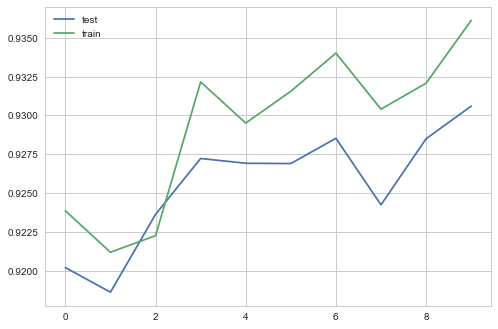

In [101]:
plt.plot(scores_cat_test, label='test')
plt.plot(scores_cat_train, label='train')
plt.legend()
plt.show()

In [106]:
#Cat boost
train_pool = Pool(train_data, train_label, cat_features=[1,2,3,4,5,6,7,8,9,14])
test_pool = Pool(test_data, cat_features=[1,2,3,4,5,6,7,8,9,14]) 
scores_cat_test = []
scores_cat_train = []

for k in range(1, 5):
    model = Pipeline([
        ('catboost', CatBoostClassifier(iterations=k, depth=15, learning_rate=1, loss_function='Logloss', logging_level='Verbose'))
    ])
    model.fit(train_pool)
    
    y_hat_test = model.predict_proba(X_test)
    scores_cat_test.append(roc_auc_score(Y_test, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X_train)
    scores_cat_train.append(roc_auc_score(Y_train, y_hat_train[:, 1]))

0:	learn: 0.2061137	total: 252ms	remaining: 0us
0:	learn: 0.2092331	total: 145ms	remaining: 145ms
1:	learn: 0.1845358	total: 444ms	remaining: 0us
0:	learn: 0.2077046	total: 5.83s	remaining: 11.7s
1:	learn: 0.1902779	total: 5.99s	remaining: 2.99s
2:	learn: 0.1686612	total: 12.9s	remaining: 0us
0:	learn: 0.2072280	total: 5.54s	remaining: 16.6s
1:	learn: 0.1783638	total: 6.1s	remaining: 6.1s
2:	learn: 0.1749259	total: 6.43s	remaining: 2.14s
3:	learn: 0.1731717	total: 6.49s	remaining: 0us


In [108]:
model = Pipeline([
    ('catboost', CatBoostClassifier(iterations=5, depth=15, learning_rate=1, loss_function='Logloss', logging_level='Verbose'))
])
model.fit(train_pool)
    
y_hat_test = model.predict_proba(X_test)
scores_cat_test.append(roc_auc_score(Y_test, y_hat_test[:, 1]))
    
y_hat_train = model.predict_proba(X_train)
print(roc_auc_score(Y_train, y_hat_train[:, 1]))

0:	learn: 0.2081895	total: 158ms	remaining: 631ms
1:	learn: 0.1913172	total: 263ms	remaining: 394ms
2:	learn: 0.1838183	total: 608ms	remaining: 405ms
3:	learn: 0.1742678	total: 1.01s	remaining: 253ms
4:	learn: 0.1728915	total: 1.05s	remaining: 0us
0.947525499697


In [113]:
to_export_3 = model.predict_proba(data_test)

In [114]:
np.savetxt(r'Olapin_test3.csv',to_export_3,delimiter=',', fmt=('%f'))

In [ ]:
#Cat boost
# initialize Pool
train_pool = Pool(train_data, train_label, cat_features=[1,2,3,4,5,6,7,8,9,14])
test_pool = Pool(test_data, cat_features=[1,2,3,4,5,6,7,8,9,14]) 

# specify the training parameters 
catreg = CatBoostRegressor(iterations=2, depth=10, learning_rate=5, loss_function='RMSE')
catboost = CatBoostClassifier(iterations=2, depth=10, learning_rate=5, loss_function='Logloss', logging_level='Verbose')
#train the model
catreg.fit(train_pool)
catboost.fit(train_pool)
# make the prediction using the resulting model
preds = catreg.predict(test_pool)
print(preds)

# make the prediction using the resulting model
preds_class = catboost.predict(test_data)
preds_proba = catboost.predict_proba(test_data)
print("class = ", preds_class)
print("proba = ", preds_proba)

catreg.score(X_test, Y_test)
catboost.score(X_test, Y_test)

In [ ]:
catboost.predict(data_test, 
        prediction_type='Class', 
        ntree_start=0, 
        ntree_end=0, 
        thread_count=-1,
        verbose=None)

In [ ]:
to_export = catboost.predict(data_test, 
        prediction_type='Class', 
        ntree_start=0, 
        ntree_end=0, 
        thread_count=-1,
        verbose=None)

In [ ]:
np.savetxt(r'Olapin_test.csv',to_export,delimiter=',', fmt=('%s'))

In [ ]:
to_export_2 = catboost.predict_proba(data_test, 
        ntree_start=0, 
        ntree_end=0, 
        thread_count=-1,
        verbose=None)

In [ ]:
np.savetxt(r'Olapin_test2.csv',to_export,delimiter=',', fmt=('%f'))

In [ ]:
data_test.iloc[0:100;'duratioin']

In [ ]:
data.iloc[:5,10:]

In [ ]:
data_test.iloc[:5,10:]